In [145]:
import json
import requests
import numpy as np
import pandas as pd
import base64
from bs4 import BeautifulSoup
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import ticker
import ipywidgets as widgets
from IPython.display import display

#### Web Scraping

In [139]:
#Publicacion resultados: https://es.investing.com/equities/apple-computer-inc-earnings
url='https://es.investing.com/equities'
headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36'}

#https://es.investing.com/equities/morehistory

html=requests.get(url,headers=headers).content
soup=BeautifulSoup(html,'lxml')

table = soup.find_all('table',{'id':'cross_rate_markets_stocks_1'})


#table id="cross_rate_markets_stocks_1"

In [148]:
table2=table[0]

In [149]:
rows=table2.find_all('tr')
rows=rows[1:]

In [150]:
titles = [row.a.get('title') for row in rows]
links = [row.a.get('href') for row in rows]

Diccionario con todas las empresas del IBEX

In [151]:
dict_companies = { titles[i] : links[i] for i in range(len(titles)) }

In [161]:
companies_dropdown=widgets.Dropdown(options=titles,description='Company:')
companies_dropdown

Dropdown(description='Company:', options=('Actividades de Construcción y Servicios S.A. (CFD)', 'Atresmedia Co…

In [167]:
company_web=dict_companies.get(companies_dropdown.value)
company_web

'/equities/bankinter'

### CREAT WIDGET PARA SELECCIONAR EMPRESA DEL DICCIONARIO Y ASIGNAR A UNA VARIABLE

In [179]:
#Publicacion resultados: https://es.investing.com/equities/apple-computer-inc-earnings
url=f'https://es.investing.com{company_web}-earnings'
headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36'}

#https://es.investing.com/equities/morehistory

html=requests.get(url,headers=headers).content
soup=BeautifulSoup(html,'lxml')

In [181]:
table = soup.find_all('table',{'class':'genTbl openTbl ecoCalTbl earnings earningsPageTbl'})

In [182]:
table2=table[0]

In [184]:
rows=table2.find_all('tr')
rows = [row.text.strip().split('\n') for row in rows]
rows =[list(filter(None,row)) for row in rows]

In [190]:
colnames = ['Date_publish','Period','BPA','PrevBPA','Revenue','PrevRevenue']
datos=rows
df=pd.DataFrame(datos[2:], columns=colnames)
df

,Date_publish,Period,BPA,PrevBPA,Revenue,PrevRevenue
0,22.01.2020,12/2019,"0,12","/ 0,12",510M,/ 510M
1,31.10.2019,09/2019,"0,15","/ 0,15","540,1M","/ 531,58M"
2,24.07.2019,06/2019,"0,18","/ 0,16",499M,"/ 496,41M"
3,27.04.2019,03/2019,"0,16","/ 0,16",505M,"/ 506,82M"
4,23.01.2019,12/2018,"0,14","/ 0,14",468M,"/ 465,99M"


In [191]:
df['Date_publish']=pd.to_datetime(df['Date_publish']).dt.date
df['Period']='30/'+df['Period']
df['Period']=pd.to_datetime(df['Period']).dt.date
df=df.replace('[,]', '.', regex=True)
df['PrevBPA']=df['PrevBPA'].replace('/', '', regex=True)
df['Revenue']=df['Revenue'].replace('[A-Z]', '', regex=True).astype(float)
df['PrevRevenue']=df['PrevRevenue'].replace('/', '', regex=True)
df['PrevRevenue']=df['PrevRevenue'].replace('[A-Z]', '', regex=True).astype(float)
df

,Date_publish,Period,BPA,PrevBPA,Revenue,PrevRevenue
0,2020-01-22,2019-12-30,0.12,0.12,510.0,510.00
1,2019-10-31,2019-09-30,0.15,0.15,540.1,531.58
2,2019-07-24,2019-06-30,0.18,0.16,499.0,496.41
3,2019-04-27,2019-03-30,0.16,0.16,505.0,506.82
4,2019-01-23,2018-12-30,0.14,0.14,468.0,465.99


### API

In [8]:
#https://financialmodelingprep.com/developer/docs/companies-key-stats-free-api/#Python

#'https://financialmodelingprep.com/api/v3/historical-price-full/AAPL'


url = 'https://financialmodelingprep.com/api/v3/historical-price-full/AMZN'
response = requests.get(url)



In [9]:
result=response.json()
result
data=pd.DataFrame(json_normalize(result))

In [10]:
#data['historical'][0]

In [11]:
data2=json_normalize(data['historical'][0])
data2

,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
0,2015-02-17,377.72,379.99,372.67,375.43,375.43,3673200.0,3673200.0,2.29,0.606,376.03000,"February 17, 15",0.00606
1,2015-02-18,373.78,376.74,372.85,373.37,373.37,2650600.0,2650600.0,0.41,0.110,374.32000,"February 18, 15",0.00110
2,2015-02-19,373.49,381.88,373.43,379.00,379.00,2953800.0,2953800.0,-5.51,-1.475,378.10333,"February 19, 15",-0.01475
3,2015-02-20,378.62,383.70,375.84,383.66,383.66,3258000.0,3258000.0,-5.04,-1.331,381.06667,"February 20, 15",-0.01331
4,2015-02-23,383.44,384.54,378.00,380.14,380.14,2177000.0,2177000.0,3.30,0.861,380.89333,"February 23, 15",0.00861
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2020-02-10,2085.01,2135.60,2084.96,2133.91,2133.91,5056200.0,5056200.0,-48.90,-2.345,2118.15667,"February 10, 20",-0.02345
1255,2020-02-11,2150.90,2185.95,2136.00,2150.80,2150.80,5746000.0,5746000.0,0.10,0.005,2157.58333,"February 11, 20",0.00005
1256,2020-02-12,2163.20,2180.25,2155.29,2160.00,2160.00,3334300.0,3334300.0,3.20,0.148,2165.18000,"February 12, 20",0.00148
1257,2020-02-13,2144.99,2170.28,2142.00,2149.87,2149.87,3031800.0,3031800.0,-4.88,-0.228,2154.05000,"February 13, 20",-0.00228


In [12]:
data3=data2[['date','open','close','volume','change','changePercent','vwap']]
data3['date']=pd.to_datetime(data3['date']).dt.date

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
data3.head(5)

,date,open,close,volume,change,changePercent,vwap
0,2015-02-17,377.72,375.43,3673200.0,2.29,0.606,376.03000
1,2015-02-18,373.78,373.37,2650600.0,0.41,0.110,374.32000
2,2015-02-19,373.49,379.00,2953800.0,-5.51,-1.475,378.10333
3,2015-02-20,378.62,383.66,3258000.0,-5.04,-1.331,381.06667
4,2015-02-23,383.44,380.14,2177000.0,3.30,0.861,380.89333


/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


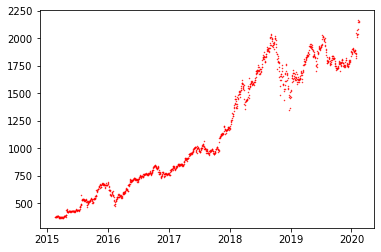

In [14]:
plt.scatter(data3['date'], data3['open'], s =0.2, c = 'red')

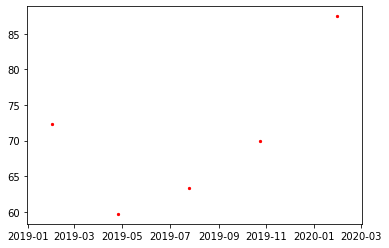

In [15]:
plt.scatter(df['Date_publish'], df['Revenue'], s =5, c = 'red')

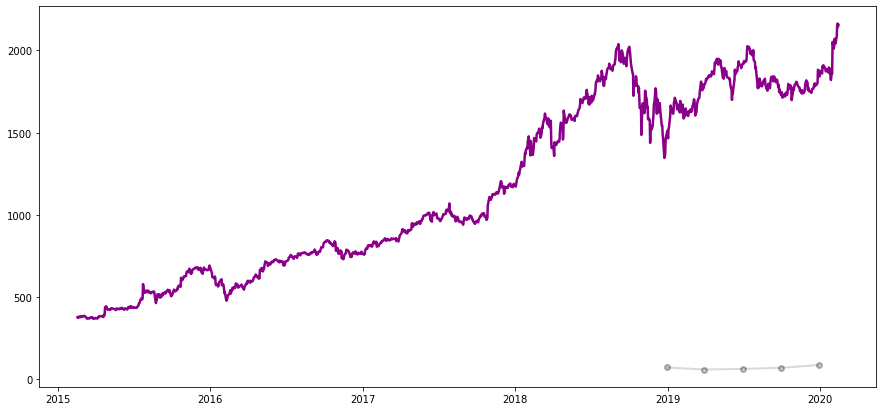

In [17]:
# Requirement 1
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(15,7))
ax.plot(data3.date,data3.open,
       linewidth=2.5,color='darkmagenta',label=2014)

line = ax.plot(df.Period,df.Revenue,
       linewidth=2,
       color='grey',
       label=2013,
       alpha=0.3,
        marker = 'o', # full list of options here : https://matplotlib.org/api/markers_api.html#module-matplotlib.markers
        markersize = 5,
        markeredgecolor = 'black',
        markeredgewidth = 2,

        # Set a name for the line : this is to be used when we have a legend in the graph
       );

